# IMDB Movie Review Classification

François Chollet's "Deep Learning with Python", Chapter 4. 

In [9]:
from tensorflow.keras.datasets import imdb
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
            num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) 
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [10]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [18]:
model.compile(optimizer="rmsprop", 
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2023-02-27 01:38:59.849805: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-27 01:39:00.594532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 4s 46ms/step - loss: 0.5214 - accuracy: 0.7769 - val_loss: 0.3834 - val_accuracy: 0.8673
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.3355 - accuracy: 0.8945

2023-02-27 01:39:03.630005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 8s 280ms/step - loss: 0.3052 - accuracy: 0.8989 - val_loss: 0.3181 - val_accuracy: 0.8769
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2210 - accuracy: 0.9285 - val_loss: 0.2917 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1791 - accuracy: 0.9393 - val_loss: 0.2752 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1442 - accuracy: 0.9549 - val_loss: 0.2798 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1203 - accuracy: 0.9604 - val_loss: 0.3122 - val_accuracy: 0.8818
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1010 - accuracy: 0.9685 - val_loss: 0.3184 - val_accuracy: 0.8790
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0807 - accuracy: 0.9771 - val_loss: 0.3270 - val_accuracy: 0.8808
Epoch 9/20
30/30 [=====

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

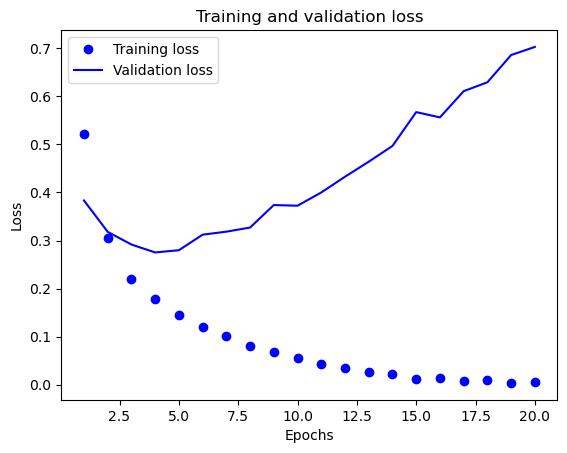

In [24]:
import matplotlib.pyplot as plt
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

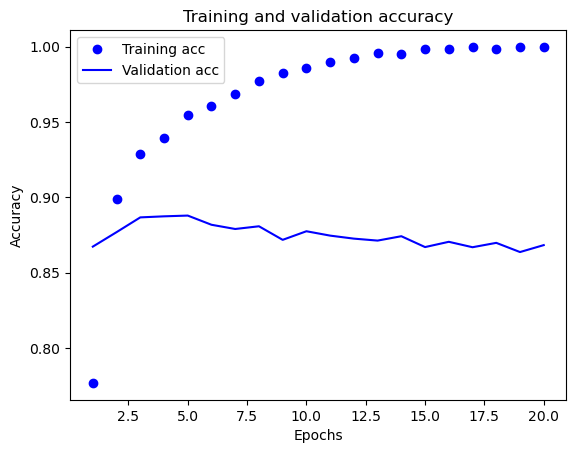

In [25]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [26]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
 1/49 [..............................] - ETA: 16s - loss: 0.3079 - accuracy: 0.9395

2023-02-27 01:44:48.029107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 11ms/step - loss: 0.2322 - accuracy: 0.9465
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1272 - accuracy: 0.9619
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.0944 - accuracy: 0.9718
Epoch 4/4
 18/782 [..............................] - ETA: 4s - loss: 0.5126 - accuracy: 0.8507

2023-02-27 01:44:51.576322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 4s 5ms/step - loss: 0.4868 - accuracy: 0.8603


In [27]:
model.predict(x_test)

 66/782 [=>............................] - ETA: 1s

2023-02-27 01:45:35.360637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 2s 2ms/step


array([[0.00678449],
       [0.9999976 ],
       [0.9857383 ],
       ...,
       [0.07695188],
       [0.0940199 ],
       [0.69272196]], dtype=float32)